In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

<h2>Loading The Dataset

In [3]:
df = pd.read_csv('baseball.csv')
df.head(10)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


<h4>Knowing The Dataset</h4>

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success.There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

<b>Features of dataset

+ <b>R</b>-Runs Scored: number of times a player crosses home plate
+ <b>AB</b>-At Bat:  plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction
+ <b>H</b>-Hit:reaching base because of a batted, fair ball without error by the defense
+ <b>2B</b>-Double: hits on which the batter reaches second base safely without the contribution of a fielding error
+ <b>3B</b>-Triple: hits on which the batter reaches third base safely without the contribution of a fielding error
+ <b>HR</b>-Homeruns: hits on which the batter successfully touched all four bases, without the contribution of a fielding error
+ <b>BB</b>-Base on Balls:hitter not swinging at four pitches called out of the strike zone and awarded first base.
+ <b>SO</b>-Strikeout:number of batters who received strike three
+ <b>SB</b>-Stolen Base: number of bases advanced by the runner while the ball is in the possession of the defense
+ <b>RA</b>-Runs Average:number of bases advanced by the runner while the ball is in the possession of the defense
+ <b>ER</b>-Earned Run:number of runs that did not occur as a result of errors or passed balls
+ <b>ERA</b>-Earned Run Average:total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched
+ <b>CG</b>-Complete Game:number of games where player was the only pitcher for their team
+ <b>SHO</b>-Shutout:number of complete games pitched with no runs allowed
+ <b>SV</b>-Save:number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher
+ <b>E</b>-Errors:number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result

<b>Target Feature</b>

+ <b>W</b>-Win:number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work 

In [4]:
df.shape

(30, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


There are no columns with object data type.Hence no requirement of encoding.

In [6]:
#checking null values
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

As we can see there are no null values

In [7]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


<H2> Exploratory Data Analysis(EDA)

<AxesSubplot:ylabel='Frequency'>

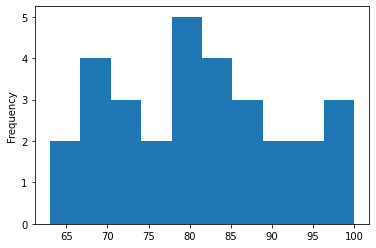

In [9]:
#Visualizing wins
df.W.plot.hist()

<AxesSubplot:xlabel='W', ylabel='R'>

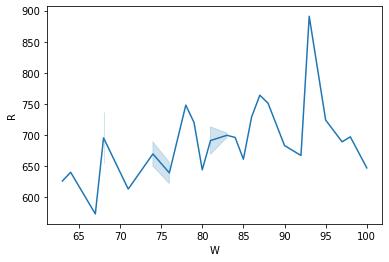

In [10]:
#runs vs wins
sns.lineplot(x='W',y='R',data=df)

<AxesSubplot:xlabel='W', ylabel='HR'>

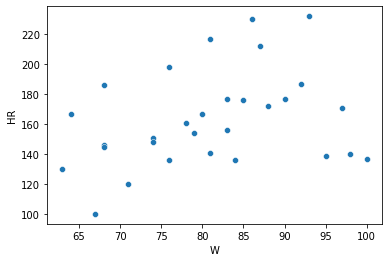

In [26]:
#homeruns vs wins
sns.scatterplot(x='W',y='HR',data=df)

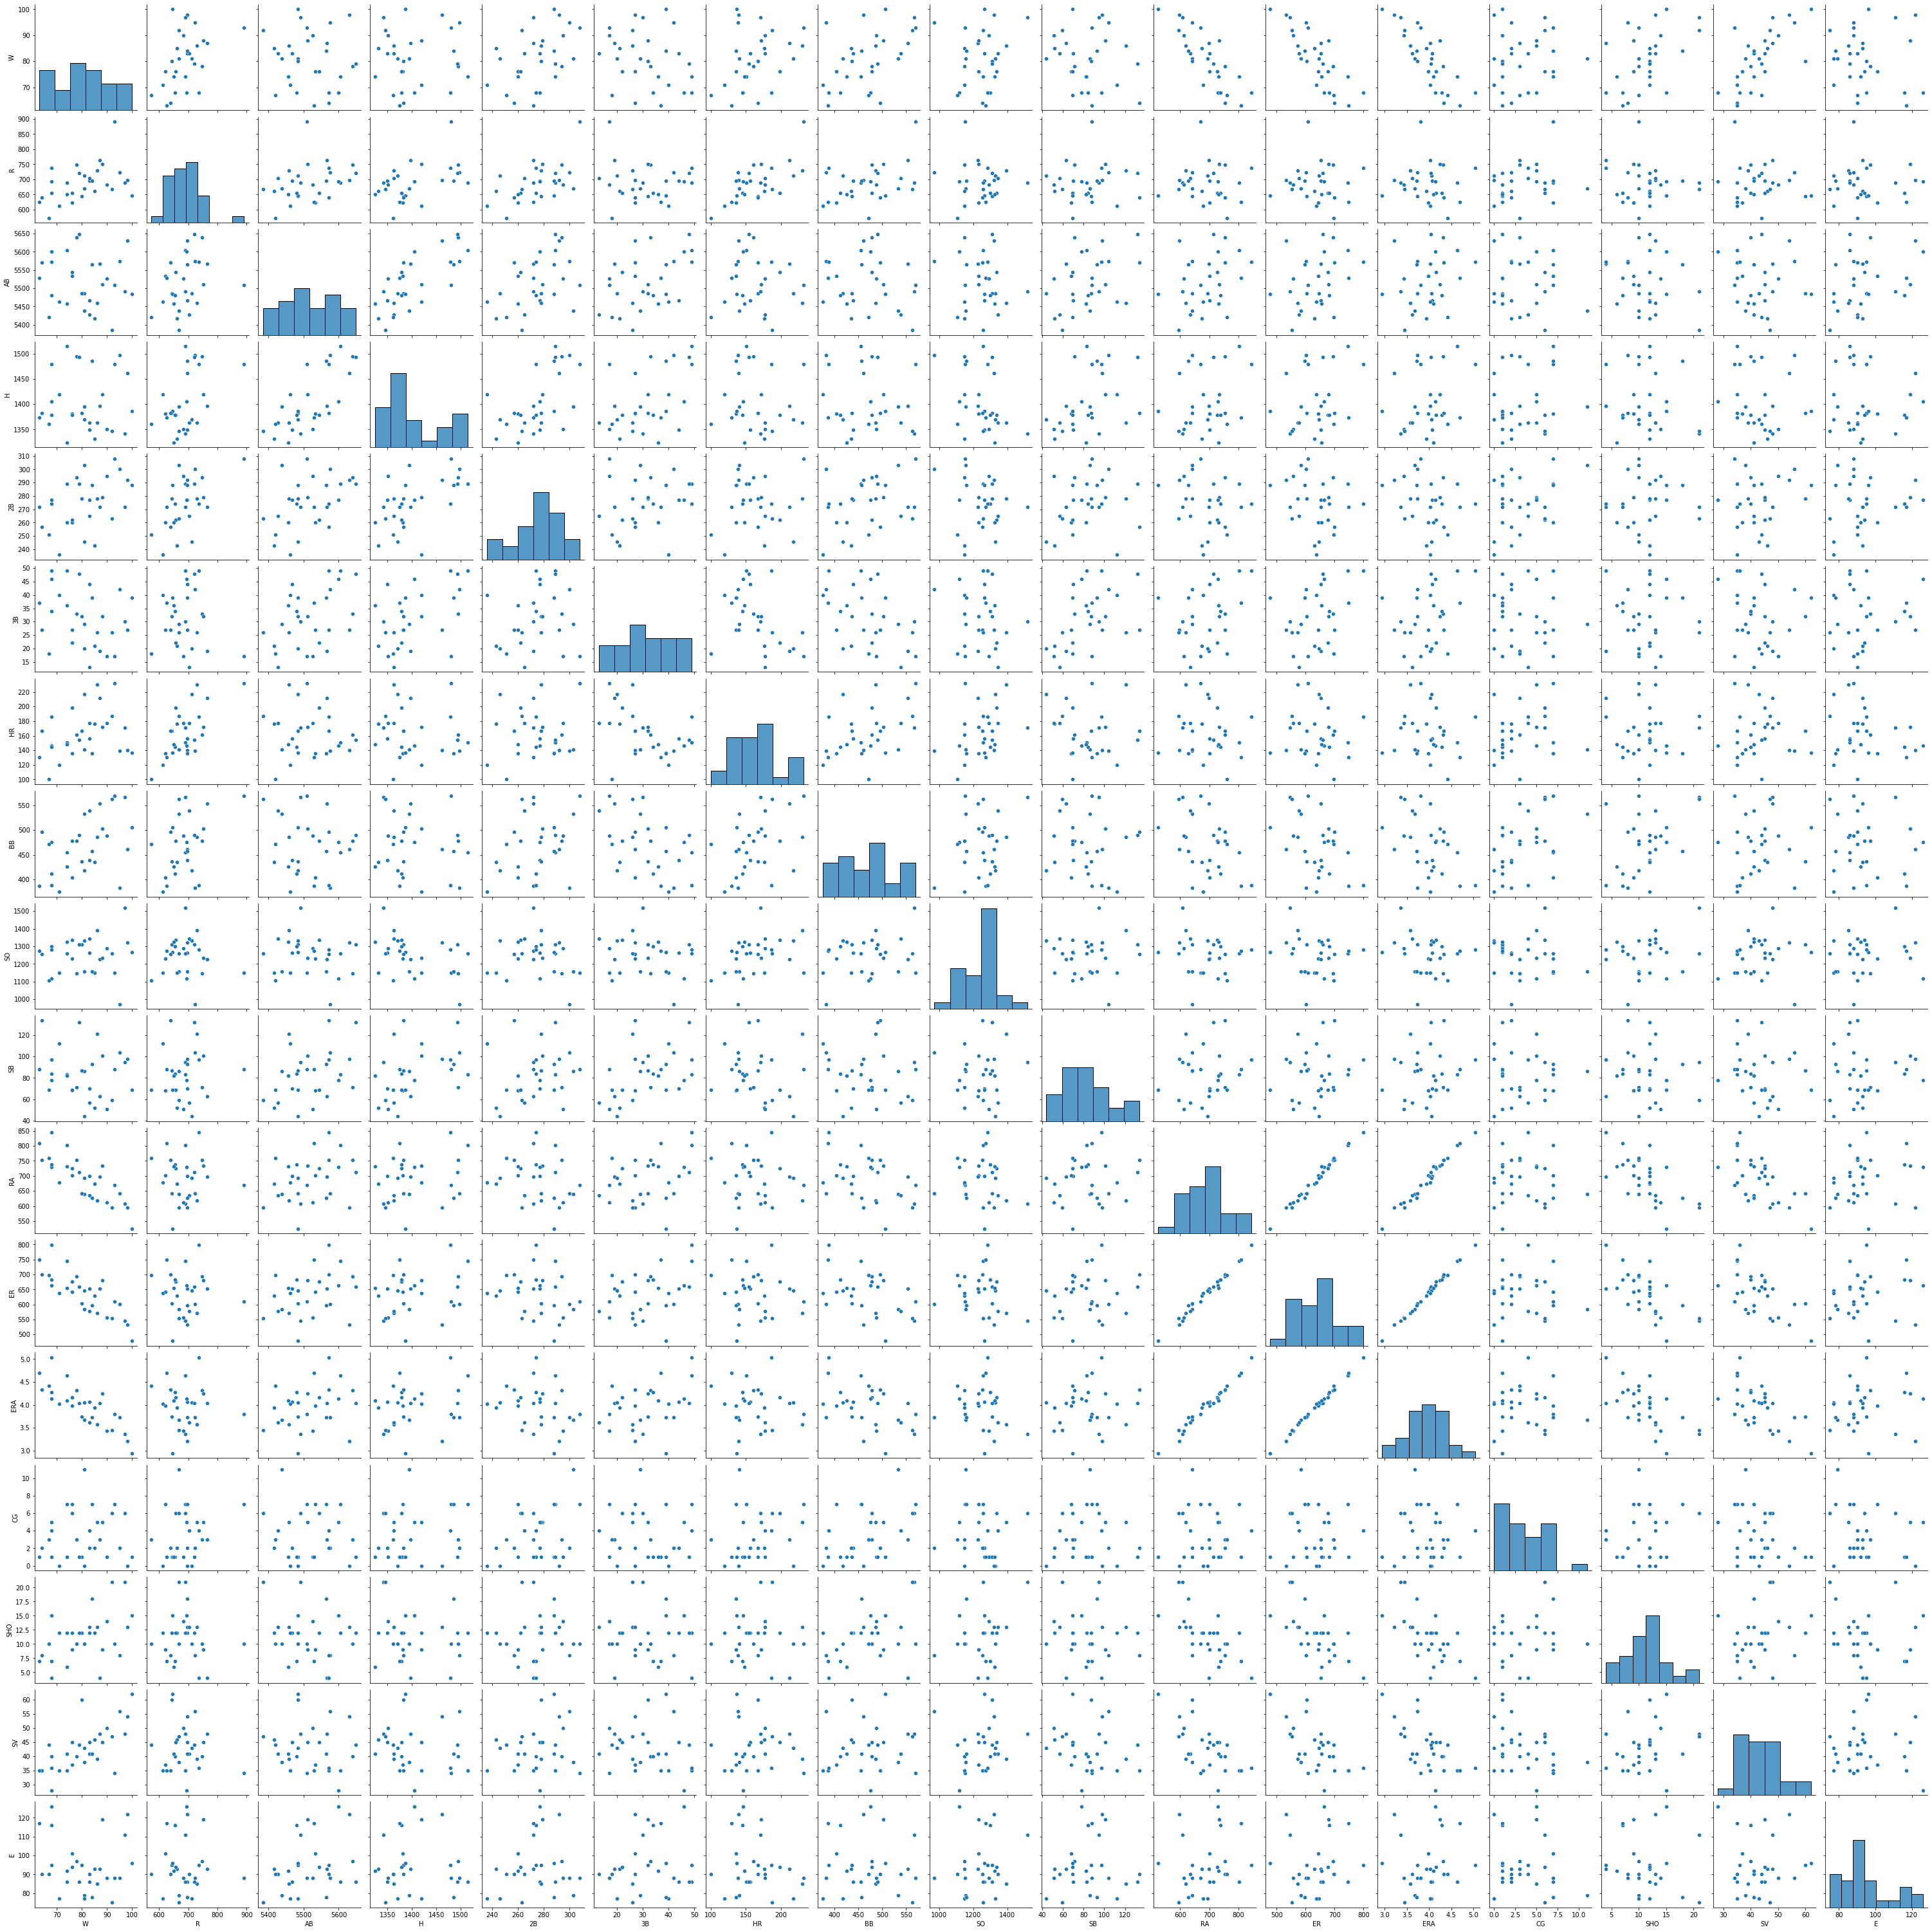

In [28]:
sns.pairplot(df)

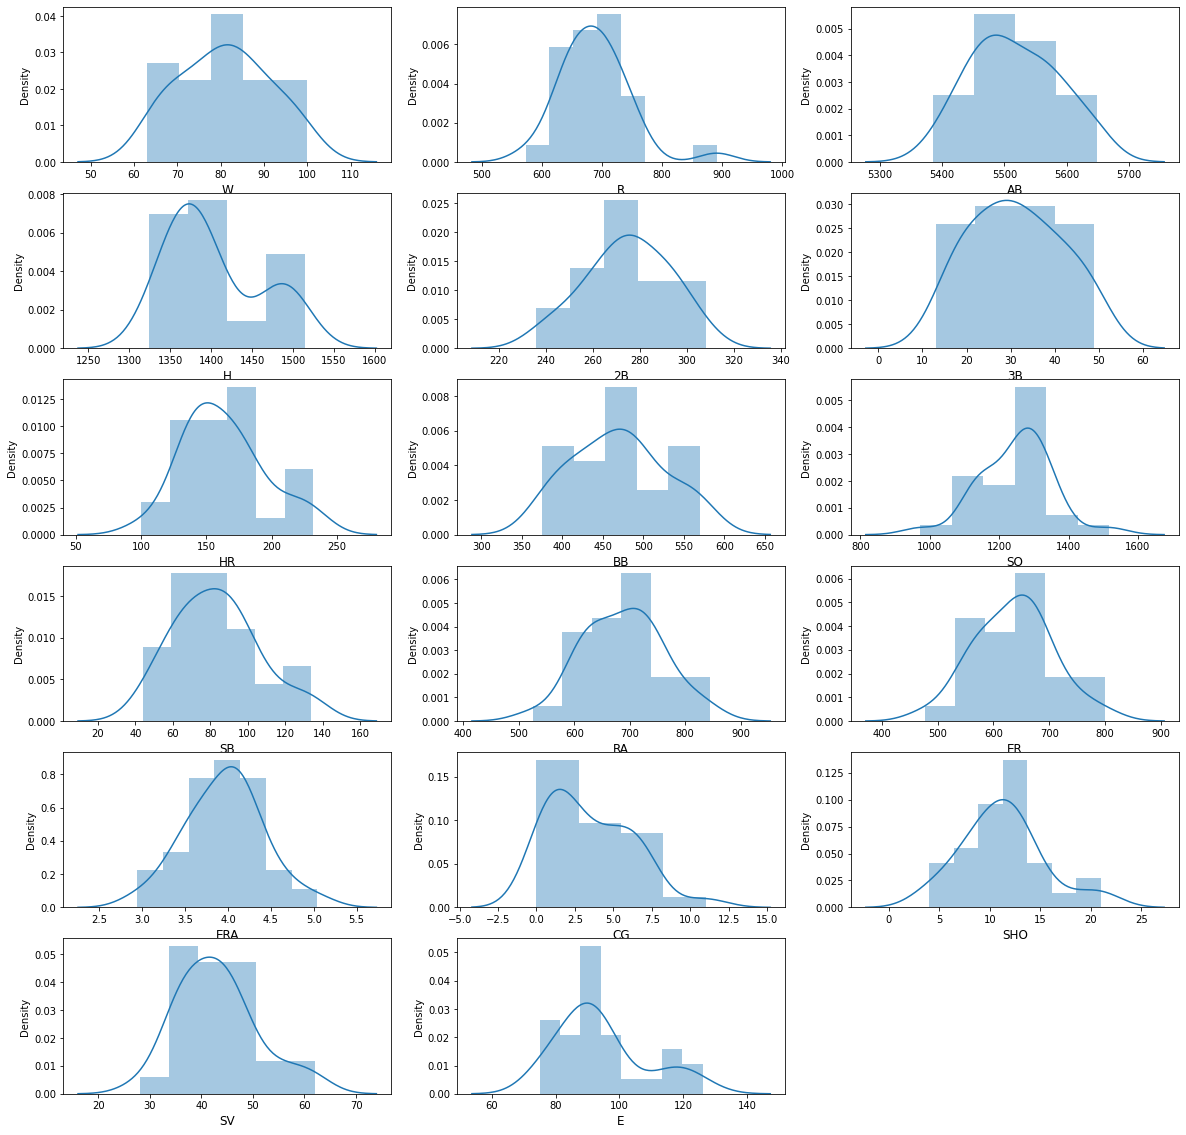

In [10]:
plt.figure(figsize=(20,20))
plotnumber=1
for i in df.columns:
    if plotnumber<=17:
        ax=plt.subplot(6,3,plotnumber)
        sns.distplot(x=df[i],ax=ax)
        plt.xlabel(i,fontsize=12)
    plotnumber+=1

<AxesSubplot:>

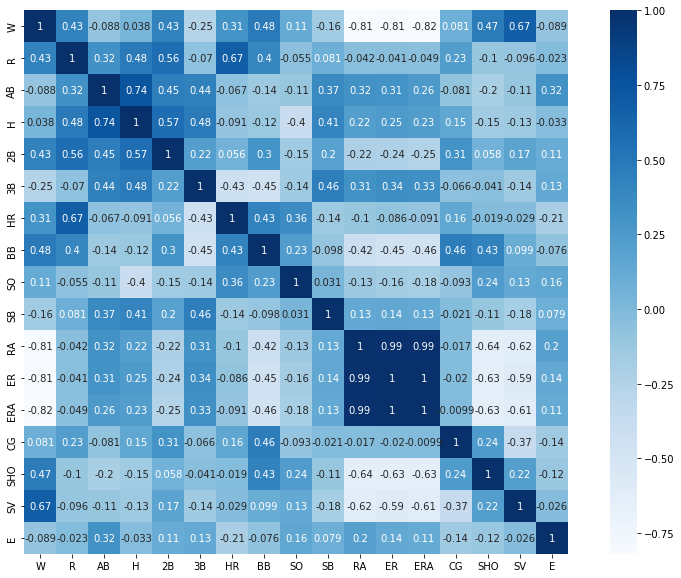

In [11]:
#checking correlation
plt.figure(figsize=(15,10))
corr=df.corr()
sns.heatmap(corr,annot=True,cmap='Blues',square=True)

<AxesSubplot:>

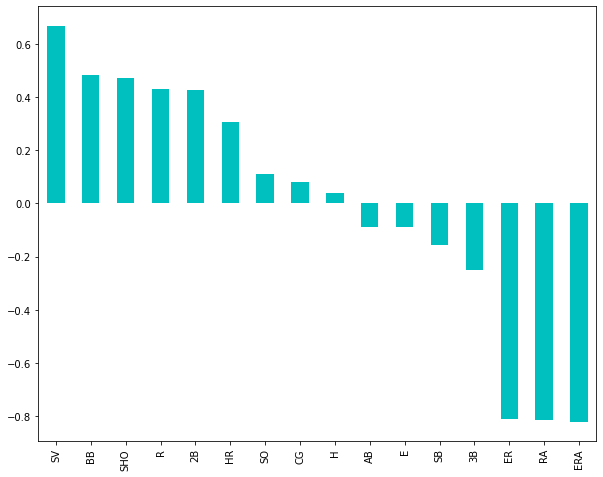

In [12]:
plt.figure(figsize=(10,8))
df.corr()['W'].sort_values(ascending=False).drop(['W']).plot(kind='bar',color='c')

From above correlation plot we can get the columns which are strongly and weakly related correlated with no of win

<b>Strongly related columns</b>
    1.SV 2.BB 3.SHO

<b> Weakly related columns</b>
    1.ERA 2.ER 3.RA 

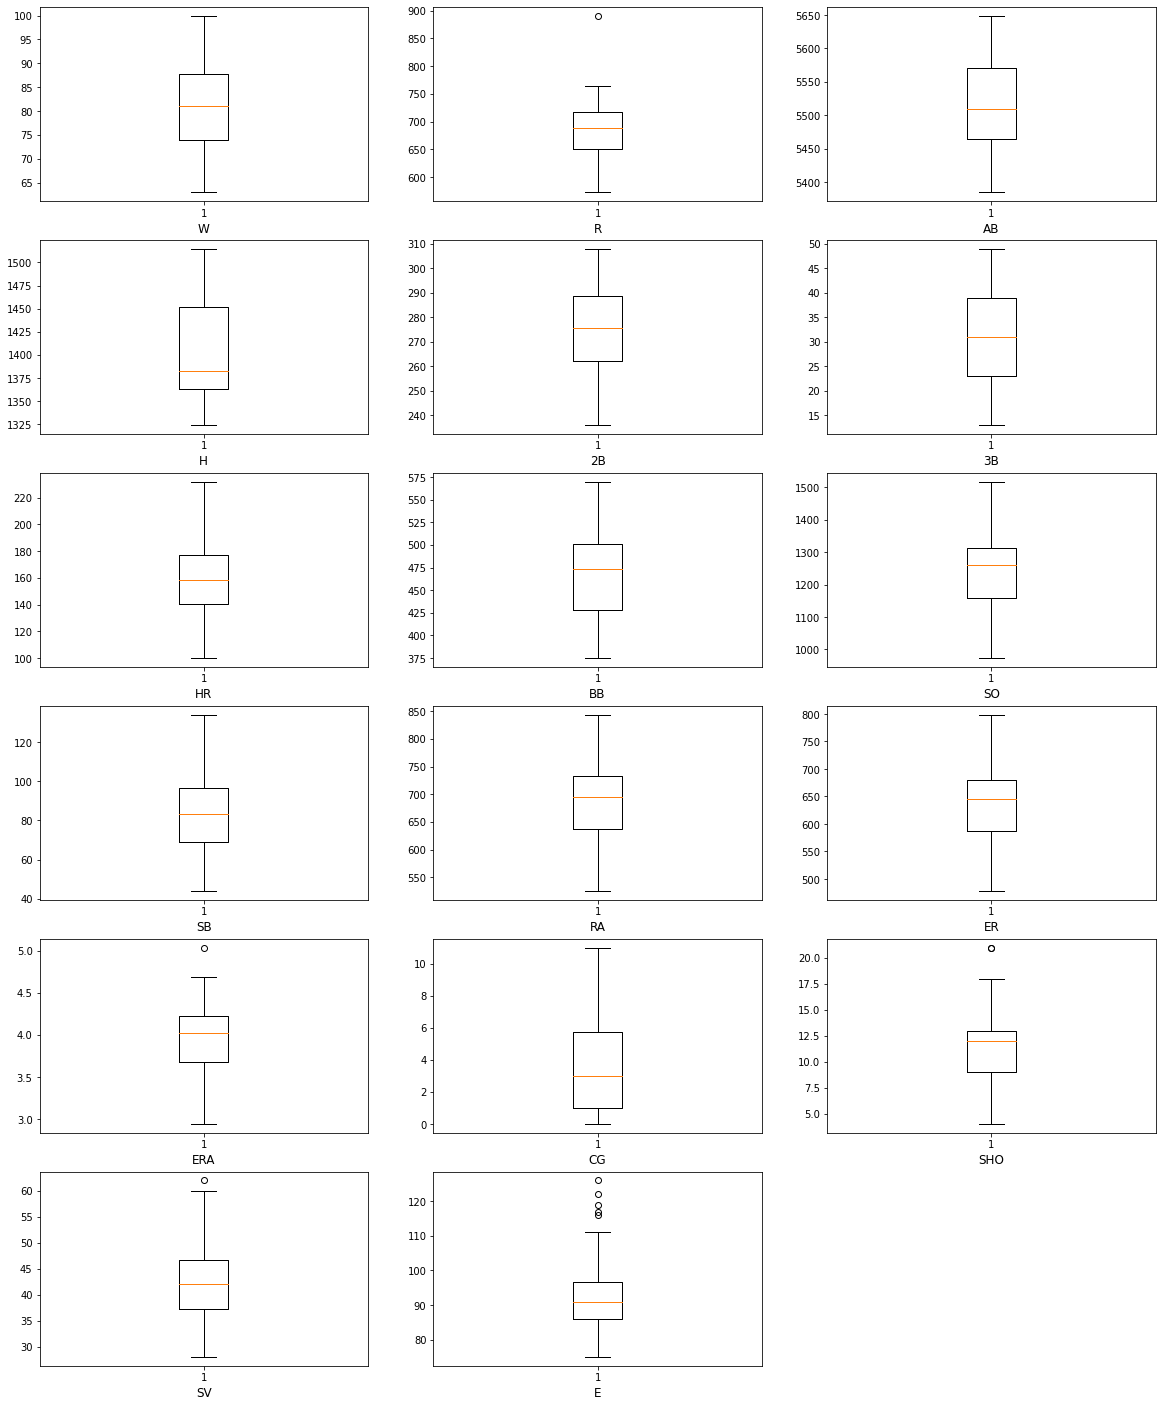

In [13]:
#checking outliers
plt.figure(figsize=(20,25))
plotnumber=1
for i in df.columns:
    if plotnumber<=17:
        ax=plt.subplot(6,3,plotnumber)
        plt.boxplot(x=df[i])
        plt.xlabel(i,fontsize=12)
    plotnumber+=1

Some columns in dataset have outliers.We will remove outliers using zscore method. 

In [33]:
df.shape

(30, 17)

In [29]:
from scipy.stats import zscore

z=np.abs(zscore(df))

np.where(z>3)

(array([5], dtype=int64), array([1], dtype=int64))

In [92]:
df_new=df[(z<3).all(axis=1)]
df_new.shape

(29, 17)

<b>Data preprocessing

In [93]:
#removing negative columns
df_new.drop(columns=['ER','ERA','RA'],axis=1,inplace=True)
df_new.shape

(29, 14)

<h2>Model Building</h2>

In [94]:
#splitting the data into dependent and independent feature
x=df_new.drop('W',axis=1)
y=df_new.W

print(x.shape)
print(y.shape)

(29, 13)
(29,)


In [95]:
#remving skewness
from sklearn.preprocessing import power_transform

df_x=power_transform(x)
df_x=pd.DataFrame(df_x)

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import sklearn.metrics as mt
import xgboost as xgb

In [99]:
#Finding the best Random state
lr=LinearRegression()
maxAccu=0
maxRS=0

for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc=r2_score(y_test,predlr)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best Accuracy',maxAccu,'Best Random state',maxRS)

Best Accuracy 0.9333095438555046 Best Random state 196


In [100]:
#splitting data with random state 112
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=196)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(23, 13)
(23,)
(6, 13)
(6,)


<H3>Linear Regression

In [101]:
lr=LinearRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)

In [102]:
print('MAE of Linear Regression',mt.mean_absolute_error(y_test,predlr))
print('MSE of Linear Regression',mt.mean_squared_error(y_test,predlr))
print('RMSE of Linear Regression',np.sqrt(mt.mean_absolute_error(y_test,predlr)))
print('MAPE of Linear Regression',100*mt.mean_absolute_error(y_test,predlr)/df['W'].mean())
print('R2 Score of Linear Regression',r2_score(y_test,predlr))

MAE of Linear Regression 1.5914776741501981
MSE of Linear Regression 7.3952305813562695
RMSE of Linear Regression 1.261537821133476
MAPE of Linear Regression 1.9655961393374204
R2 Score of Linear Regression 0.9333095438555046


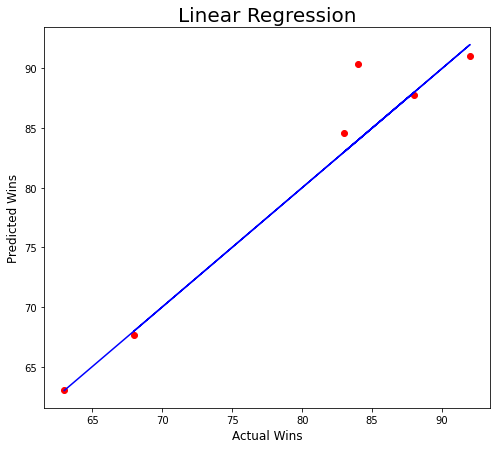

In [103]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test,y=predlr,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Wins',fontsize=12)
plt.ylabel('Predicted Wins',fontsize=12)
plt.title('Linear Regression',fontsize=20)
plt.show()

<h3>Decision Tree

In [104]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred_dt=dt.predict(x_test)

In [105]:
print('MAE of Decision Tree',mt.mean_absolute_error(y_test,pred_dt))
print('MSE of Decision Tree',mt.mean_squared_error(y_test,pred_dt))
print('RMSE of Decision Tree',np.sqrt(mt.mean_absolute_error(y_test,pred_dt)))
print('MAPE of Decision Tree',100*mt.mean_absolute_error(y_test,pred_dt)/df['W'].mean())
print('R2 Score of Decision Tree',r2_score(y_test,pred_dt))

MAE of Decision Tree 7.0
MSE of Decision Tree 61.666666666666664
RMSE of Decision Tree 2.6457513110645907
MAPE of Decision Tree 8.645533141210375
R2 Score of Decision Tree 0.44388777555110215


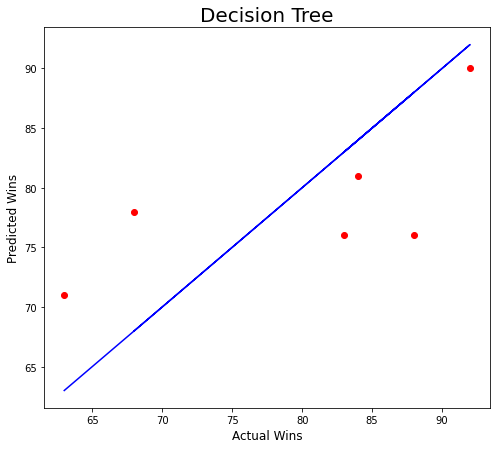

In [106]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test,y=pred_dt,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Wins',fontsize=12)
plt.ylabel('Predicted Wins',fontsize=12)
plt.title('Decision Tree',fontsize=20)
plt.show()

<h3>Random Forest

In [107]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
pred_rf=rf.predict(x_test)

In [108]:
print('MAE of Random Forest',mt.mean_absolute_error(y_test,pred_rf))
print('MSE of Random Forest',mt.mean_squared_error(y_test,pred_rf))
print('RMSE of Random Forest',np.sqrt(mt.mean_absolute_error(y_test,pred_rf)))
print('MAPE of Random Forest',100*mt.mean_absolute_error(y_test,pred_rf)/df['W'].mean())
print('R2 Score of Random Forest',r2_score(y_test,pred_rf))

MAE of Random Forest 6.248333333333335
MSE of Random Forest 47.64571666666669
RMSE of Random Forest 2.4996666444414815
MAPE of Random Forest 7.7171675586661195
R2 Score of Random Forest 0.5703292084168334


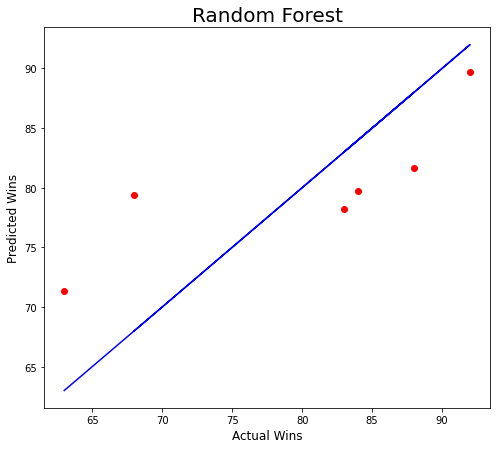

In [109]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test,y=pred_rf,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Wins',fontsize=12)
plt.ylabel('Predicted Wins',fontsize=12)
plt.title('Random Forest',fontsize=20)
plt.show()

<h3>Support Vector Regression

In [110]:
from sklearn.model_selection import GridSearchCV,cross_val_score
# finding the best parameters for the SVR model
svr=SVR()
param = {
    'C': [0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svr= GridSearchCV(svr, param_grid = param, scoring = 'accuracy', cv = 6)

In [111]:
grid_svr.fit(x_train,y_train)

GridSearchCV(cv=6, estimator=SVR(),
             param_grid={'C': [0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [112]:
grid_svr.best_params_

{'C': 0.8, 'gamma': 0.1, 'kernel': 'linear'}

In [113]:
svr=SVR(C=0.8,gamma=0.1,kernel='linear')
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)

In [114]:
print('MAE of Support Vector Regression ',mt.mean_absolute_error(y_test,pred_svr))
print('MSE of Support Vector Regression',mt.mean_squared_error(y_test,pred_svr))
print('RMSE of Support Vector Regression',np.sqrt(mt.mean_absolute_error(y_test,pred_svr)))
print('MAPE of Support Vector Regression',100*mt.mean_absolute_error(y_test,pred_svr)/df['W'].mean())
print('R2 Score of Support Vector Regression',r2_score(y_test,pred_svr))

MAE of Support Vector Regression  3.650019111325738
MSE of Support Vector Regression 18.206330737395614
RMSE of Support Vector Regression 1.9105023191102748
MAPE of Support Vector Regression 4.508051599002559
R2 Score of Support Vector Regression 0.8358146526687771


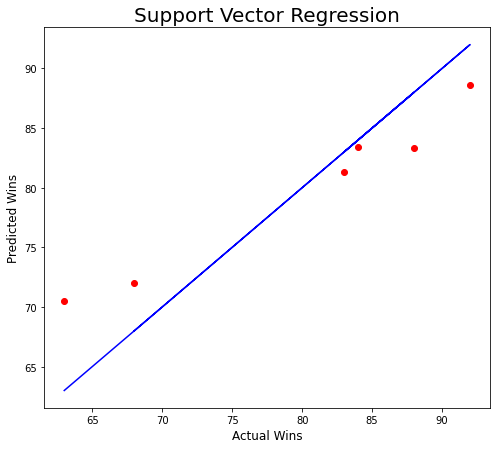

In [115]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test,y=pred_svr,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Wins',fontsize=12)
plt.ylabel('Predicted Wins',fontsize=12)
plt.title('Support Vector Regression',fontsize=20)
plt.show()

<h3>XGBoost

In [116]:
xgbr =xgb.XGBRegressor(n_estimators=100,learning_rate=0.1,gamma=0,subsample=0.5,colsample_bytree=1,max_depth=5)
xgbr.fit(x_train,y_train)
pred_xgb=xgbr.predict(x_test)

In [117]:
print('MAE of XGBoost ',mt.mean_absolute_error(y_test,pred_xgb))
print('MSE of XGBoost',mt.mean_squared_error(y_test,pred_xgb))
print('RMSE of XGBoost',np.sqrt(mt.mean_absolute_error(y_test,pred_xgb)))
print('MAPE of XGBoost',100*mt.mean_absolute_error(y_test,pred_xgb)/df['W'].mean())
print('R2 Score of XGBoost',r2_score(y_test,pred_xgb))

MAE of XGBoost  4.877611796061198
MSE of XGBoost 40.39309581634976
RMSE of XGBoost 2.2085315927242695
MAPE of XGBoost 6.024222061829392
R2 Score of XGBoost 0.6357336048625772


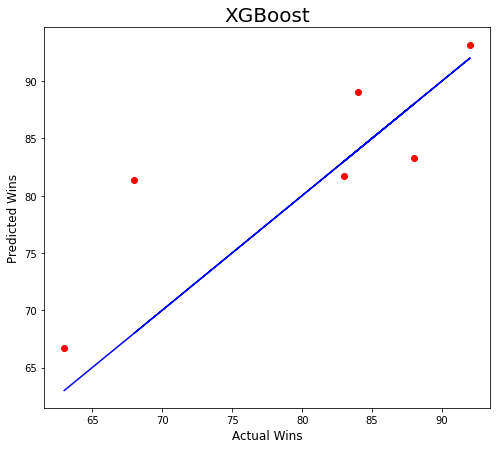

In [118]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test,y=pred_xgb,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Wins',fontsize=12)
plt.ylabel('Predicted Wins',fontsize=12)
plt.title('XGBoost',fontsize=20)
plt.show()

<h3>Reguralization

In [119]:
from sklearn.linear_model import Lasso,Ridge

parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,10)),}
ls=Lasso()

clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [120]:
ls= Lasso(alpha=1,random_state=0)

ls.fit(x_train,y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
lss

0.9239679681812987

In [134]:
re=Ridge()
clf=GridSearchCV(re,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [135]:
re=Ridge(alpha=10,random_state=0)

re.fit(x_train,y_train)
pred_re=re.predict(x_test)

print(r2_score(y_test,pred_re))

0.8187359942212826


<h2>Cross Validation

In [131]:
#linear regression
scr=cross_val_score(lr,x,y,cv=6)
print(scr.mean()*100)

-31.787195515338816


In [130]:
#decision tree
scr=cross_val_score(dt,x,y,cv=6)
print(scr.mean()*100)

-94.34216207907315


In [129]:
#Random forest
scr=cross_val_score(rf,x,y,cv=6)
print(scr.mean()*100)

15.587210509859764


In [82]:
#SVR
scr=cross_val_score(svr,x,y,cv=)
print(scr.mean()*100)

-185.3222765716031


In [132]:
#XGBoost
scr=cross_val_score(xgbr,x,y,cv=6)
print(scr.mean()*100)

13.630609071947038


In [133]:
#lasso
scr=cross_val_score(ls,x,y,cv=6)
print(scr.mean()*100)

25.064534083060465


In [137]:
#ridge
scr=cross_val_score(re,x,y,cv=6)
print(scr.mean()*100)

21.87440019878616


<H3>Hyper Parameter Tuning

In [148]:
param={'alpha':[0.1,0.01,0.001,0.0001],
       'selection':['random','cyclic']}

lasso_hp=GridSearchCV(Lasso(),param,cv=6)
lasso_hp.fit(x_train,y_train)

lasso_hp.best_params_

{'alpha': 0.1, 'selection': 'random'}

In [149]:
ls=Lasso(alpha=0.1,selection='random')

ls.fit(x_train,y_train)
pred=ls.predict(x_test)

print(r2_score(y_test,pred))

0.9497736241359268


In [150]:
param_r={'alpha':[0.1,0.01,0.001,0.0001],
         'solver':['auto','lqsr','svd','sag']}

ridge_hp=GridSearchCV(Ridge(),param_r,cv=6)
ridge_hp.fit(x_train,y_train)

ridge_hp.best_params_

{'alpha': 0.1, 'solver': 'sag'}

In [151]:
re=Ridge(alpha=0.1,solver='sag')

re.fit(x_train,y_train)
pred_r=re.predict(x_test)

print(r2_score(y_test,pred_r))

0.9388570205799426


From above we can conclude that Lasso Regression model is best model with r2 score of 94.97%

<b>Saving the model

In [156]:
import joblib
joblib.dump(ls,'baseball.obj')

['baseball.obj']

In [157]:
job=joblib.load('baseball.obj')
job

Lasso(alpha=0.1, selection='random')